# Candidate Analysis

---

I’ve been working to expand my data science skill set since I enrolled in Springboard’s Data Science Career Track bootcamp, so I have completed this assignment in a Jupyter Notebook as a sample of my work. For more of my work, please see my bootcamp GitHub repository: https://github.com/ashtonreed/Springboard

Here are 5 questions I was given on the assignment, and in the notebook below, you will find the desired answers and other insights I uncovered:
1. What were the Sales results in 2018?
2. What were the Profit Margin results in 2018?
3. Was the business impacted by Price Increases in 2018?
4. Would you recommend eliminating any items from the assortment?
5. Were the new items in 2018 successful?

The code cells were run in sequential order, and then the Jupyter Notebook was saved as a pdf for better accessibility. Above each code cell is an explanation of what that section of code is meant to accomplish, and any comments on what the code does within the cell are denoted by "#". I have broken this notebook down into 6 subsections--in the first subsection I am reading in the data and setting up the dataframe with the necessary columns. In the other 5 subsections, I am working to answer one of the five questions above. 

Please note that this notebook is set up so that someone who isn't familiar with Python can still step through the problem-solving process to answer the questions outlined above.

---

## Setup: Reading in the data from the Excel file and adding "Dollar Sales" and "Profit Margin" columns

In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

First, we read in the dataset by specifying the name of the Excel file, the specific sheet name in the Excel file (since there were 2 in this case, one with the data and one with the questions), and the row in which the header is found (beginning by counting from 0 instead of 1).

Below, we assign the dataframe from the Excel file to the variable name "df" for simplicity:

In [2]:
df = pd.read_excel('Candidate_Analysis.xlsx', sheet_name='Dataset', header=0)

Next, we check to see what the first 5 rows of the dataframe look like.

In [3]:
df.head() 

,Item,Year,Item Cost,Item Price,Unit Sales
0,052020-1010,2018,100,148,1175
1,052020-1011,2018,94,156,1205
2,052020-1012,2018,86,176,1125
3,052020-1013,2018,124,178,980
4,052020-1014,2018,71,141,1050


Then we check to see what the last 5 rows of the dataframe look like.

In [4]:
df.tail()

,Item,Year,Item Cost,Item Price,Unit Sales
997,052020-1496,2017,120,186,960
998,052020-1497,2017,103,154,1000
999,052020-1498,2017,99,177,900
1000,052020-1499,2017,105,185,900
1001,052020-1500,2017,86,183,940


To get a better understanding of the dataset that we're working with, we'll also check out the shape, which is displayed as "(# of rows, # of columns)".

In [5]:
df.shape

(1002, 5)

To see information such as the number of data points in a column, the mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and the maximum, we will use the "describe" method.

In [6]:
df.describe()

,Year,Item Cost,Item Price,Unit Sales
count,1002.00000,1002.000000,1002.000000,1002.000000
mean,2017.50000,100.441118,167.162675,1068.862275
std,0.50025,17.878909,18.893901,192.103226
min,2017.00000,71.000000,130.000000,810.000000
25%,2017.00000,86.000000,151.000000,980.000000
50%,2017.50000,100.000000,166.000000,1060.000000
75%,2018.00000,115.750000,183.000000,1130.000000
max,2018.00000,146.000000,218.000000,5500.000000


Now that we have a better idea of what our dataset looks like, we will create a new column called "Dollar Sales" by multiplying the "Item Price" and "Unit Sales" columns.

In [7]:
df['Dollar Sales'] = df['Item Price'] * df['Unit Sales']

We want to now look at the header and top 3 rows of the dataframe to ensure this new "Dollar Sales" column has been added.

In [8]:
df.head(3)

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales
0,052020-1010,2018,100,148,1175,173900
1,052020-1011,2018,94,156,1205,187980
2,052020-1012,2018,86,176,1125,198000


We can see that it was added and appears as we expect it to.

Next, we want to create a new column called "Profit Margin" by multiplying the "Unit Sales" column by the difference between the "Item Price" and "Item Cost" columns.

In [9]:
df['Profit Margin'] = (df['Item Price'] - df['Item Cost']) * df['Unit Sales']

Looking at the header and top 3 rows of the dataframe to ensure this new "Profit Margin" column has been added.

In [10]:
df.head(3)

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin
0,052020-1010,2018,100,148,1175,173900,56400
1,052020-1011,2018,94,156,1205,187980,74710
2,052020-1012,2018,86,176,1125,198000,101250


It has been added and appears the way we'd expect it to.

---

## 1. What were the Sales results in 2018?

We want to group the data by year (and set the year as the index). Then we will sum up the values in the "Dollar Sales" column for each year. (We will worry about formatting for readability in the next step.)

In [11]:
total_sales = df.groupby('Year', as_index=True)['Dollar Sales'].sum()
total_sales

Year
2017    87556490
2018    91058620
Name: Dollar Sales, dtype: int64

We can use our new index (2017 and 2018) to assign the values to a variable.

In [12]:
total_sales_2018 = total_sales.loc[2018]
total_sales_2017 = total_sales.loc[2017]

We now have 2 new dataframes, one for 2017 and one for 2018. We can still access the full dataframe (2017 and 2018) at any point by calling "df".

The code below prints out two sentences detailing the total sales for both years, along with the percent change. The top part of the code prints out the sales for the two years. The if-else sequence below that determines whether the company saw positive growth, negative growth, or no growth in 2018.

In [13]:
print('The total sales made in 2018 were equal to ${0:,.2f}, as opposed to ${1:,.2f} in 2017.'\
      .format(total_sales_2018, total_sales_2017))



# If the value in 2018 was greater than in 2017, the company experienced positive growth.
if total_sales_2018 > total_sales_2017:
    print('This means the company saw a positive growth of {:.2f}% in 2018.'\
          .format((total_sales_2018-total_sales_2017)/total_sales_2017*100))

# Otherwise, if the value in 2018 was less than in 2017, the company experienced negative growth.
elif total_sales_2018 < total_sales_2017:
    print('This means the company saw a negative growth of {:.2f}% in 2018.'\
          .format(abs(total_sales_2018-total_sales_2017)/total_sales_2017*100))

# Otherwise, if the values for 2018 and 2017 are equal, the company experienced no growth. 
elif total_sales_2018 == total_sales_2017:
    print('There was no change in 2018.')

# And finally, if none of the above cases are true and no other error has been thrown, there could still be an issue 
# that we need to look more closely at.
else:
    print('Error: Please check input values')

The total sales made in 2018 were equal to $91,058,620.00, as opposed to $87,556,490.00 in 2017.
This means the company saw a positive growth of 4.00% in 2018.


The text above was generated by the preceding code cell. We see that the company experienced positive growth in 2018.

Next, we'll work to create a histogram so that we can see the distribution of sales for each of the items (with the data from the two years overlaid so that we get a good visual represenation of how the two years compare).

First, we create a dataframe for each year.

In [14]:
year_2018 = df.loc[df['Year'] == 2018]
year_2017 = df.loc[df['Year'] == 2017]

Then we can create the distribution plot of sales. We'll also include a dotted line to indicate the mean for each year. 

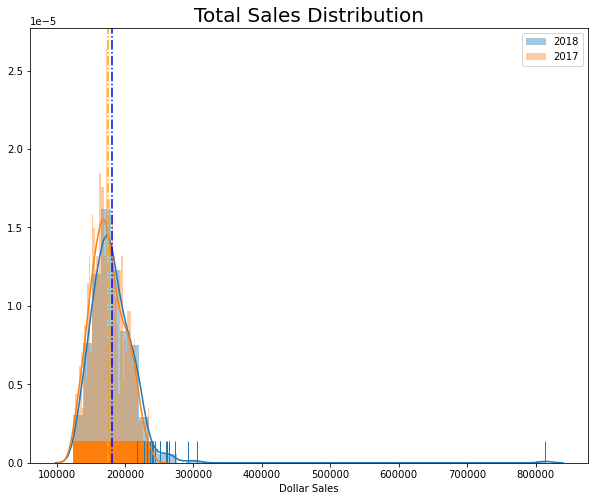

In [15]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(a=year_2018['Dollar Sales'], bins=50, rug=True, label=year_2018['Year'])
_ = sns.distplot(a=year_2017['Dollar Sales'], bins=50, rug=True, label=year_2017['Year'])
_ = plt.axvline(np.mean(year_2018['Dollar Sales']), c='blue', linestyle = '-.')
_ = plt.axvline(np.mean(year_2017['Dollar Sales']), c='orange', linestyle = '-.')
_ = plt.title('Total Sales Distribution', fontsize=20)
_ = plt.legend()
plt.show()

From looking at the histogram above, we can see that one item in 2018 achieved more than $800,000 in sales, which is definitely worth investigating further because it is such an extreme outlier.

We will determine the dollar value of this max sales outlier and output the index and item number.

In [16]:
max_sales_2018 = year_2018['Dollar Sales'].max()
max_sales_item_2018 = year_2018['Item'].loc[year_2018['Dollar Sales'] == max_sales_2018]
print(max_sales_2018)
print(max_sales_item_2018)

814000
491    052020-1501
Name: Item, dtype: object


Now we will look at the maximum sales in 2017 and print out the dollar value, index, and the item number.

In [17]:
max_sales_2017 = year_2017['Dollar Sales'].max()
max_sales_item_2017 = year_2017['Item'].loc[year_2017['Dollar Sales'] == max_sales_2017]
print(max_sales_2017)
print(max_sales_item_2017)

237600
672    052020-1171
Name: Item, dtype: object


Using the item number for our runaway best seller in 2018, we will search the 2017 dataframe to see how this item performed the previous year.

In [18]:
year_2017.loc[year_2017['Item'] == '052020-1501']

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin


Because our results above are blank, it appears that out 2018 outlier was a new item that was added in 2018. While the majority of the items in the dataset were sold in both 2017 and 2018, some were discontinued after 2017 and replaced with new products in 2018. This must have been one of the new products.

We can also create a histogram so that we can see the distribution of sales for each of the items--excluding our $800k outlier.

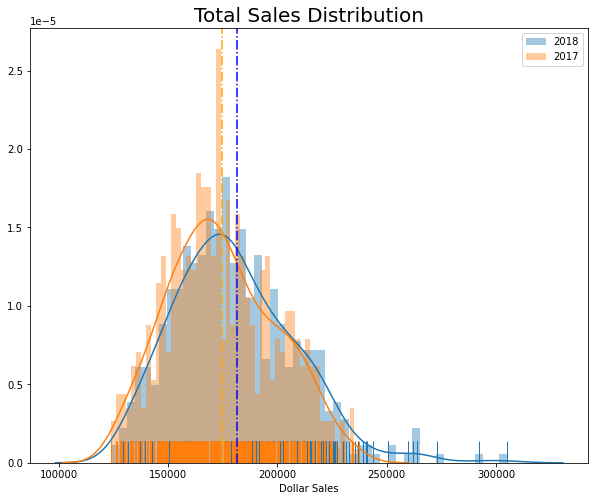

In [19]:

_ = plt.figure(figsize=(10,8))
_ = sns.distplot(a=year_2018['Dollar Sales'][year_2018['Dollar Sales'] < 800000], bins=50, 
                 rug=True, label=year_2018['Year'])
_ = sns.distplot(a=year_2017['Dollar Sales'], bins=50, rug=True, label=year_2017['Year'])
_ = plt.axvline(np.mean(year_2018['Dollar Sales']), c='blue', linestyle = '-.')
_ = plt.axvline(np.mean(year_2017['Dollar Sales']), c='orange', linestyle = '-.')
_ = plt.title('Total Sales Distribution', fontsize=20)
_ = plt.legend()
plt.show()

In [20]:
year_2017.quantile([0.025, 0.975])

,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin
0.025,2017.0,71.0,138.0,900.0,130800.0,17850.0
0.975,2017.0,131.0,197.0,1190.0,223020.0,123960.0


In [21]:
year_2018.quantile([0.025, 0.975])

,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin
0.025,2018.0,71.0,138.0,900.0,135045.0,19035.0
0.975,2018.0,131.5,198.0,1245.0,240697.5,128170.0


In [22]:
np.percentile(year_2018['Dollar Sales'], [2.5, 97.5])

array([135045. , 240697.5])

---

## 2. What were the Profit Margin results in 2018?

In [23]:
# We want to group the data by year (and set the year as the index) then sum up the values in the "Profit Margin"
# column for each year
total_profit_margin = df.groupby('Year', as_index=True)['Profit Margin'].sum()
total_profit_margin

Year
2017    35058500
2018    35912170
Name: Profit Margin, dtype: int64

In [24]:
# Using our new index (2017 and 2018) to assign the values to a variable
total_profit_margin_2018 = total_profit_margin.loc[2018]
total_profit_margin_2017 = total_profit_margin.loc[2017]



# Here we print the total profit margin for both years
print('The total profit margin in 2018 were equal to ${0:,.2f}, as opposed to ${1:,.2f} in 2017.'\
      .format(total_profit_margin_2018, total_profit_margin_2017))



# If the value in 2018 was greater than in 2017, the company experienced positive growth.
if total_profit_margin_2018 > total_profit_margin_2017:
    print('This means the company saw a positive growth of {:.2f}% in 2018.'\
          .format((total_profit_margin_2018-total_profit_margin_2017)/total_profit_margin_2017*100))

# Otherwise, if the value in 2018 was less than in 2017, the company experienced negative growth.    
elif total_profit_margin_2018 < total_profit_margin_2017:
    print('This means the company saw a negative growth of {:.2f}% in 2018.'\
          .format(abs(total_profit_margin_2018-total_profit_margin_2017)/total_profit_margin_2017*100))

# Otherwise, if the values for 2018 and 2017 are equal, the company experienced no growth.     
elif total_profit_margin_2018 == total_profit_margin_2017:
    print('There was no change in 2018.')

# And finally, if none of the above cases are true and no other error has been thrown, there could still be an issue 
# that we need to look more closely at.  
else:
    print('Error: Please check input values')

The total profit margin in 2018 were equal to $35,912,170.00, as opposed to $35,058,500.00 in 2017.
This means the company saw a positive growth of 2.43% in 2018.


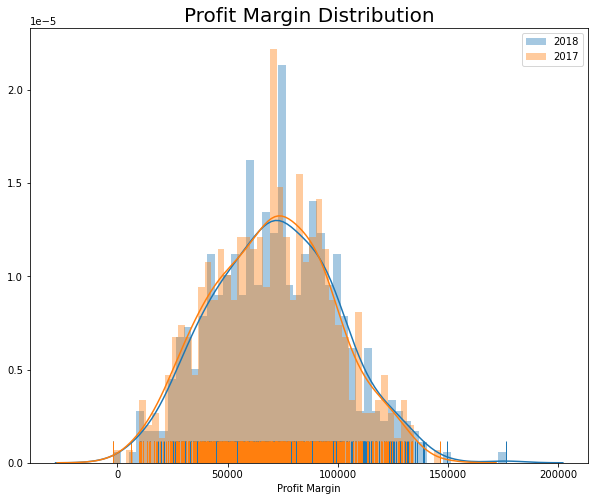

In [25]:
# Creating a histogram so we can see the distribution of profit margin for each of the items

# We will re-use the variables below that we calculated in Question #1:
# year_2018 = df.loc[df['Year'] == 2018]
# year_2017 = df.loc[df['Year'] == 2017]

# Creating the distribution plot of profit margin
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.distplot(a=year_2018['Profit Margin'], ax=ax, bins=50, rug=True, label=year_2018['Year'])
_ = sns.distplot(a=year_2017['Profit Margin'], ax=ax, bins=50, rug=True, label=year_2017['Year'])
_ = plt.title('Profit Margin Distribution', fontsize=20)
_ = plt.legend()
plt.show()

---

## 3. Was the business impacted by Price Increases in 2018?

In [26]:
years_merged = year_2017.merge(year_2018, on='Item', how='outer', suffixes=('_2017', '_2018'))
years_merged

,Item,Year_2017,Item Cost_2017,Item Price_2017,Unit Sales_2017,Dollar Sales_2017,Profit Margin_2017,Year_2018,Item Cost_2018,Item Price_2018,Unit Sales_2018,Dollar Sales_2018,Profit Margin_2018
0,052020-1000,2017.0,119.0,145.0,1080.0,156600.0,28080.0,NaN,NaN,NaN,NaN,NaN,NaN
1,052020-1001,2017.0,108.0,176.0,920.0,161920.0,62560.0,NaN,NaN,NaN,NaN,NaN,NaN
2,052020-1002,2017.0,81.0,160.0,950.0,152000.0,75050.0,NaN,NaN,NaN,NaN,NaN,NaN
3,052020-1003,2017.0,93.0,173.0,1130.0,195490.0,90400.0,NaN,NaN,NaN,NaN,NaN,NaN
4,052020-1004,2017.0,102.0,145.0,1150.0,166750.0,49450.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,052020-1506,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,100.0,132.0,1900.0,250800.0,60800.0
507,052020-1507,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,100.0,132.0,2000.0,264000.0,64000.0
508,052020-1508,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,100.0,131.0,2000.0,262000.0,62000.0
509,052020-1509,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,100.0,130.0,2100.0,273000.0,63000.0


In [27]:
years_merged_cleaned = years_merged.dropna().reset_index(drop=True).drop(['Year_2017', 'Year_2018'], axis=1)
years_merged_cleaned

,Item,Item Cost_2017,Item Price_2017,Unit Sales_2017,Dollar Sales_2017,Profit Margin_2017,Item Cost_2018,Item Price_2018,Unit Sales_2018,Dollar Sales_2018,Profit Margin_2018
0,052020-1010,97.0,144.0,1200.0,172800.0,56400.0,100.0,148.0,1175.0,173900.0,56400.0
1,052020-1011,94.0,156.0,1170.0,182520.0,72540.0,94.0,156.0,1205.0,187980.0,74710.0
2,052020-1012,78.0,160.0,1160.0,185600.0,95120.0,86.0,176.0,1125.0,198000.0,101250.0
3,052020-1013,118.0,169.0,1010.0,170690.0,51510.0,124.0,178.0,980.0,174440.0,52920.0
4,052020-1014,71.0,141.0,1020.0,143820.0,71400.0,71.0,141.0,1050.0,148050.0,73500.0
...,...,...,...,...,...,...,...,...,...,...,...
486,052020-1496,120.0,186.0,960.0,178560.0,63360.0,120.0,186.0,980.0,182280.0,64680.0
487,052020-1497,103.0,154.0,1000.0,154000.0,51000.0,103.0,154.0,1040.0,160160.0,53040.0
488,052020-1498,99.0,177.0,900.0,159300.0,70200.0,99.0,177.0,910.0,161070.0,70980.0
489,052020-1499,105.0,185.0,900.0,166500.0,72000.0,105.0,185.0,910.0,168350.0,72800.0


In [28]:
price_increase_items = []
for index, row in years_merged_cleaned.iterrows():
    if years_merged_cleaned['Item Price_2018'].iloc[index] > years_merged_cleaned['Item Price_2017'].iloc[index]:
        price_increase_items.append(row)

price_increase_info = pd.DataFrame(price_increase_items).reset_index(drop=True)
price_increase_info.head(3)

# Compare item-wise pandas
# Or 2017-2018 is >0

,Item,Item Cost_2017,Item Price_2017,Unit Sales_2017,Dollar Sales_2017,Profit Margin_2017,Item Cost_2018,Item Price_2018,Unit Sales_2018,Dollar Sales_2018,Profit Margin_2018
0,052020-1010,97.0,144.0,1200.0,172800.0,56400.0,100.0,148.0,1175.0,173900.0,56400.0
1,052020-1012,78.0,160.0,1160.0,185600.0,95120.0,86.0,176.0,1125.0,198000.0,101250.0
2,052020-1013,118.0,169.0,1010.0,170690.0,51510.0,124.0,178.0,980.0,174440.0,52920.0


In [29]:
len(price_increase_items)

60

In [30]:
price_increase_info['Dollar Sales_2018'].sum() - price_increase_info['Dollar Sales_2017'].sum()

404705.0

Even with a price increase in these 60 items, they still saw a sales increase of $404,705.00 in 2018.

In [31]:
items_affected_by_increase = []
for index, row in price_increase_info.iterrows():
    if price_increase_info['Dollar Sales_2018'].iloc[index] < price_increase_info['Dollar Sales_2017'].iloc[index]:
        items_affected_by_increase.append(row)
        
sold_less_w_increase = pd.DataFrame(items_affected_by_increase)
sold_less_w_increase

,Item,Item Cost_2017,Item Price_2017,Unit Sales_2017,Dollar Sales_2017,Profit Margin_2017,Item Cost_2018,Item Price_2018,Unit Sales_2018,Dollar Sales_2018,Profit Margin_2018
15,052020-1033,87.0,189.0,940.0,177660.0,95880.0,96.0,208.0,840.0,174720.0,94080.0
17,052020-1036,100.0,188.0,900.0,169200.0,79200.0,110.0,207.0,810.0,167670.0,78570.0
21,052020-1042,83.0,189.0,1090.0,206010.0,115540.0,92.0,208.0,990.0,205920.0,114840.0
25,052020-1048,132.0,159.0,1120.0,178080.0,30240.0,146.0,175.0,1010.0,176750.0,29290.0
31,052020-1057,73.0,147.0,1010.0,148470.0,74740.0,81.0,162.0,900.0,145800.0,72900.0
39,052020-1069,111.0,186.0,1180.0,219480.0,88500.0,123.0,205.0,1055.0,216275.0,86510.0
47,052020-1081,86.0,198.0,990.0,196020.0,110880.0,95.0,218.0,880.0,191840.0,108240.0
49,052020-1084,72.0,169.0,1100.0,185900.0,106700.0,80.0,186.0,980.0,182280.0,103880.0
59,052020-1099,102.0,177.0,1150.0,203550.0,86250.0,102.0,195.0,1025.0,199875.0,95325.0


In [32]:
len(sold_less_w_increase)

9

In [33]:
print(str(len(price_increase_items)), 'items saw a price increase but only', len(sold_less_w_increase), 
      'of those experienced a drop in sales')

60 items saw a price increase but only 9 of those experienced a drop in sales


---

## 4. Would you recommend eliminating any items from the assortment?

In [34]:
# Here we are looking at the dataframe to see if any items have a negative profit margin
negative_margin = df.loc[df['Profit Margin'] < 0] 
# Instead of 0, we could also use another threshold, i.e. if the company wanted to drop any items with a profit margin
# less than $10,000

negative_margin

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin
364,052020-1374,2018,132,130,1000,130000,-2000
875,052020-1374,2017,132,130,970,126100,-1940


In [35]:
# As seen above, items sold in both 2017 and 2018 will appear twice in our original dataframe. We want to list each
# item only once.
# Using the .unique() method returns an array with the value/string we are looking for, along with the data type. For
# this reason, we want the [0] index of the array (just the item number).
items_to_remove = negative_margin['Item'].unique()[0]
items_to_remove

'052020-1374'

In [36]:
print('I would suggest removing Item #', items_to_remove)

I would suggest removing Item # 052020-1374


---

## 5. Were the new items in 2018 successful?

In [37]:
# Initializing our [empty] list
new_items_2018_list = []

# For the items in 2018:
for item in list(year_2018['Item']): 
    # If the item does not also appear in 2017:
    if item not in list(year_2017['Item']): 
        # Add it to our list of items that are new in 2018
        new_items_2018_list.append(item)       

# We want to view the list so we can ensure it looks like a feasible answer
new_items_2018_list

# Can also look at n/a

['052020-1501',
 '052020-1502',
 '052020-1503',
 '052020-1504',
 '052020-1505',
 '052020-1506',
 '052020-1507',
 '052020-1508',
 '052020-1509',
 '052020-1510']

In [38]:
# Now that we have the item numbers in a list, we want to go back and pull all data associated with these items from
# the full dataframe wherever the item name is in our list of new items.
new_items_2018_info = df.loc[df['Item'].isin(new_items_2018_list)]
new_items_2018_info

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin
491,052020-1501,2018,116,148,5500,814000,176000
492,052020-1502,2018,100,132,2000,264000,64000
493,052020-1503,2018,100,132,2000,264000,64000
494,052020-1504,2018,100,132,2215,292380,70880
495,052020-1505,2018,100,132,1900,250800,60800
496,052020-1506,2018,100,132,1900,250800,60800
497,052020-1507,2018,100,132,2000,264000,64000
498,052020-1508,2018,100,131,2000,262000,62000
499,052020-1509,2018,100,130,2100,273000,63000
500,052020-1510,2018,100,130,2000,260000,60000


In [39]:
year_2017.mean()

Year               2017.000000
Item Cost            99.972056
Item Price          166.728543
Unit Sales         1047.904192
Dollar Sales     174763.453094
Profit Margin     69977.045908
dtype: float64

In [40]:
new_items_2018_info > year_2017.mean()

,Dollar Sales,Item,Item Cost,Item Price,Profit Margin,Unit Sales,Year
491,True,False,True,False,True,True,True
492,True,False,True,False,False,True,True
493,True,False,True,False,False,True,True
494,True,False,True,False,True,True,True
495,True,False,True,False,False,True,True
496,True,False,True,False,False,True,True
497,True,False,True,False,False,True,True
498,True,False,True,False,False,True,True
499,True,False,True,False,False,True,True
500,True,False,True,False,False,True,True


In [41]:
# Summing up the number of units sold for new items in 2018
new_units_2018 = new_items_2018_info['Unit Sales'].sum()

# Summing up the "Unit Sales" for ALL items in 2018
year_2018_units = year_2018['Unit Sales'].sum()

# Calculating the percentage (new / all * 100)
new_percentage_of_units_2018 = new_items_2018_info['Unit Sales'].sum() / year_2018['Unit Sales'].sum() * 100

# Determining what percentage of the items sold in 2018 were items first introduced that same year
catalog_percentage = len(new_items_2018_info) / len(year_2018) * 100

# Printing the results
print('There were {0:,.0f} units of new items sold in 2018, accounting for {1:.2f}% of 2018\'s total sold volume \
despite making up only {2:.2f}% of the catalog that year.'.format(new_units_2018, new_percentage_of_units_2018, 
                                                                  catalog_percentage))

There were 23,615 units of new items sold in 2018, accounting for 4.33% of 2018's total sold volume despite making up only 2.00% of the catalog that year.


In [42]:
# Summing up the "Dollar Sales" for the new items in 2018
new_items_2018_sales = new_items_2018_info['Dollar Sales'].sum()

# Summing up the "Dollar Sales" for ALL items in 2018
year_2018_sales = year_2018['Dollar Sales'].sum()

# Calculating the percentage (new / all * 100)
new_percentage_of_sales_2018 = new_items_2018_info['Dollar Sales'].sum() / year_2018['Dollar Sales'].sum() * 100

# Printing the results
print('The new items added in 2018 accounted for ${0:,.2f} in sales, which translates to {1:.2f}% of 2018\'s sales.'\
     .format(new_items_2018_sales, new_percentage_of_sales_2018))

The new items added in 2018 accounted for $3,194,980.00 in sales, which translates to 3.51% of 2018's sales.


In [43]:
# Summing up the "Profit Margin" for the new items in 2018
new_items_2018_profit = new_items_2018_info['Profit Margin'].sum()

# Summing up the "Profit Margin" for ALL items in 2018
year_2018_profit = year_2018['Profit Margin'].sum()

# Calculating the percentage (new / all * 100)
new_percentage_of_profit_2018 = new_items_2018_info['Profit Margin'].sum() / year_2018['Profit Margin'].sum() * 100

# Printing the results
print('The new items added in 2018 accounted for ${0:,.2f} in profit, which translates to {1:.2f}% of 2018\'s profit.'\
     .format(new_items_2018_profit, new_percentage_of_profit_2018))

The new items added in 2018 accounted for $745,480.00 in profit, which translates to 2.08% of 2018's profit.


---

## Useful information for further analysis

* What each item is (i.e. Which is more popular--M12 or M18? Do saws sell better or do drills sell better?)
* Competitors' pricing
* Region/company where items were sold
* Data broken down by month or day to uncover trends or seasonality
* Any concurrent pricing promotions that would explain trends mentioned in the bullet point above
* How much inventory is left over at the end of the year (tax purposes)

Regarding the item that is currently being sold at a loss, is it possible to manufacture this item at a lower cost? Or is it possible to raise the price? How does the pricing compare with competitors'? At what profit margin will it be "worth it" to manufacture and sell this item? Is this new sale price so high that many customers will opt out of buying it?

---

## Adding "Profit Percentage" column per post-interview feedback

In [44]:
df['Profit Percentage'] = (df['Item Price'] - df['Item Cost']) / df['Item Cost'] * 100
df

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin,Profit Percentage
0,052020-1010,2018,100,148,1175,173900,56400,48.000000
1,052020-1011,2018,94,156,1205,187980,74710,65.957447
2,052020-1012,2018,86,176,1125,198000,101250,104.651163
3,052020-1013,2018,124,178,980,174440,52920,43.548387
4,052020-1014,2018,71,141,1050,148050,73500,98.591549
...,...,...,...,...,...,...,...,...
997,052020-1496,2017,120,186,960,178560,63360,55.000000
998,052020-1497,2017,103,154,1000,154000,51000,49.514563
999,052020-1498,2017,99,177,900,159300,70200,78.787879
1000,052020-1499,2017,105,185,900,166500,72000,76.190476


In [45]:
df.sort_values('Profit Percentage', ascending=False)

,Item,Year,Item Cost,Item Price,Unit Sales,Dollar Sales,Profit Margin,Profit Percentage
879,052020-1378,2017,71,197,1040,204880,131040,177.464789
368,052020-1378,2018,71,197,1080,212760,136080,177.464789
974,052020-1473,2017,71,194,1050,203700,129150,173.239437
463,052020-1473,2018,71,194,1070,207580,131610,173.239437
761,052020-1260,2017,73,198,1030,203940,128750,171.232877
...,...,...,...,...,...,...,...,...
725,052020-1224,2017,130,139,1160,161240,10440,6.923077
665,052020-1164,2017,132,139,910,126490,6370,5.303030
154,052020-1164,2018,132,139,910,126490,6370,5.303030
364,052020-1374,2018,132,130,1000,130000,-2000,-1.515152
